In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [3]:
data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv')

In [4]:
data.head(10)

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
5,5,i feel jealous becasue i wanted that kind of l...,love
6,6,when a friend of mine keeps telling me morbid ...,neutral
7,7,i finally fell asleep feeling angry useless an...,worry
8,8,i feel a bit annoyed and antsy in a good way,neutral
9,9,i feel like i ve regained another vital part o...,neutral


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839555 entries, 0 to 839554
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  839555 non-null  int64 
 1   text        839555 non-null  object
 2   Emotion     839555 non-null  object
dtypes: int64(1), object(2)
memory usage: 19.2+ MB


In [6]:
data_array = data.to_numpy()

In [7]:
data

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
...,...,...,...
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral


In [8]:
data.tail(10)

,Unnamed: 0,text,Emotion
839545,839545,i feel that i must confess even though it kill...,neutral
839546,839546,i don t know why today i feel like it looks ve...,neutral
839547,839547,i don t even feel like i fully resolved it but...,neutral
839548,839548,i feel like i have been neglecting you my fait...,neutral
839549,839549,i cry and feel a sense of loss when my patient...,neutral
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral
839554,839554,i think that after i had spent some time inves...,neutral


Check Missing Values

In [9]:
missing_values = data.iloc[:, :10].isnull().sum()

missing_values

Unnamed: 0    0
text          0
Emotion       0
dtype: int64

Dropping the unnamed index column and converting the remaining DataFrame to a NumPy array

In [10]:
data_np = data.drop(columns=["Unnamed: 0"]).to_numpy()

Inspecting the first few rows in NumPy format to confirm conversion

In [11]:
data_np[:5]

array([['i seriously hate one subject to death but now i feel reluctant to drop it',
        'hate'],
       ['im so full of life i feel appalled', 'neutral'],
       ['i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it',
        'neutral'],
       ['ive been really angry with r and i feel like an idiot for trusting him in the first place',
        'anger'],
       ['i feel suspicious if there is no one outside like the rapture has happened or something',
        'neutral']], dtype=object)

Data Visualization

In [12]:
# Checking the shape of the array
shape_info = data_np.shape

# Checking for missing values
missing_values_info = np.count_nonzero(pd.isnull(data_np))

# Getting a sense of the distribution of emotions
emotions, counts = np.unique(data_np[:, 1], return_counts=True)
emotion_distribution = dict(zip(emotions, counts))

shape_info, missing_values_info, emotion_distribution

((839555, 2),
 0,
 {'anger': 12336,
  'boredom': 126,
  'empty': 5542,
  'enthusiasm': 9304,
  'fun': 10075,
  'happiness': 27175,
  'hate': 15267,
  'love': 39553,
  'neutral': 674538,
  'relief': 16729,
  'sadness': 17481,
  'surprise': 6954,
  'worry': 4475})

Word Cloud

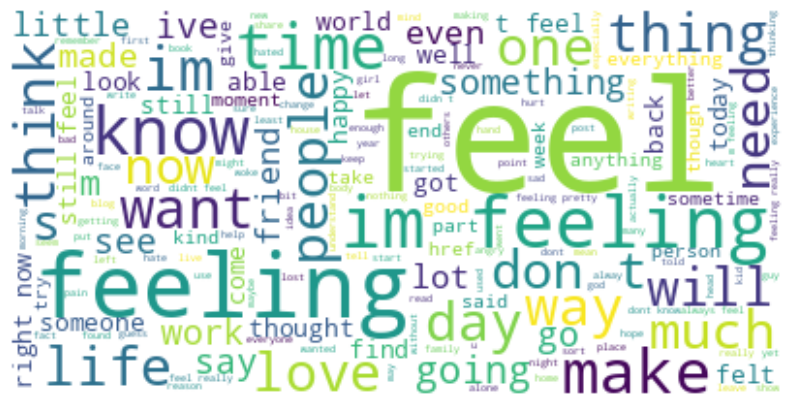

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv')

# Combine all texts into a single string
all_texts = ' '.join(data['text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(all_texts)

# Display the generated image:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Plotting the distribution of emotions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


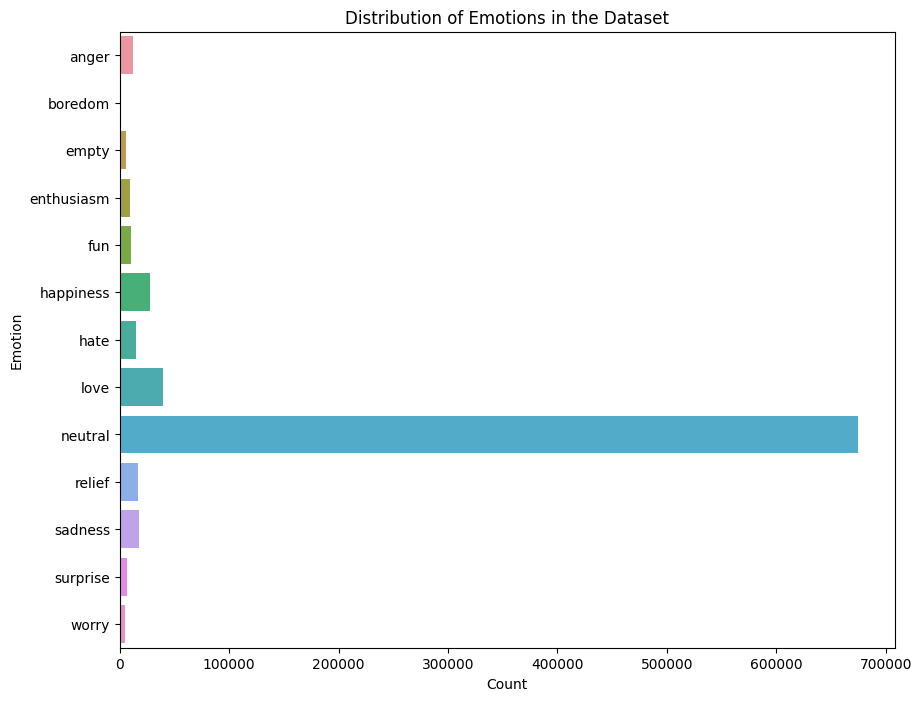

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(x=list(emotion_distribution.values()), y=list(emotion_distribution.keys()))
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

Splitting the data and then move on to the text preprocessing

In [14]:
# Splitting the data into features (X) and target (y)
X = data_np[:, 0]  # Text column
y = data_np[:, 1]  # Emotion column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((671644,), (167911,), (671644,), (167911,))

In [15]:
import re

# Function to preprocess the text data
def preprocess_text(text):
    # Lowercasing
    text_lower = text.lower()
    
    # Removing punctuation and special characters (keeping only letters and numbers)
    text_clean = re.sub(r'[^a-z0-9\s]', '', text_lower)
    
    # Tokenization (splitting the text into words)
    tokens = text_clean.split()
    
    return tokens

# Applying the preprocessing function to the 'text' column
data['processed_text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the dataframe to check the processed text
data.head()

,Unnamed: 0,text,Emotion,processed_text
0,0,i seriously hate one subject to death but now ...,hate,"[i, seriously, hate, one, subject, to, death, ..."
1,1,im so full of life i feel appalled,neutral,"[im, so, full, of, life, i, feel, appalled]"
2,2,i sit here to write i start to dig out my feel...,neutral,"[i, sit, here, to, write, i, start, to, dig, o..."
3,3,ive been really angry with r and i feel like a...,anger,"[ive, been, really, angry, with, r, and, i, fe..."
4,4,i feel suspicious if there is no one outside l...,neutral,"[i, feel, suspicious, if, there, is, no, one, ..."


In [16]:
import numpy as np

,# Let's assume we have successfully preprocessed the text and now focus on creating a simple bag-of-words model.



# For demonstration, let's use a simplified version of the dataset (first few rows) and pretend it's fully preprocessed
# This is to demonstrate the approach; in practice, you'd use the entire preprocessed dataset.
sample_texts = ["i feel happy", "i feel sad", "happy and joyful", "sad and lonely"]
sample_emotions = ["happy", "hate", "happy", "sad", "neutral"]  # Simplified emotion labels for demonstration

# Create a vocabulary from the sample texts
vocab = set(word for text in sample_texts for word in text.split())
vocab = sorted(list(vocab))  # Sort the vocabulary for consistency

# Vectorize the texts into a simple bag-of-words model
def vectorize_text(text, vocabulary):
    vector = np.zeros(len(vocabulary), dtype=int)
    words = text.split()
    for word in words:
        if word in vocabulary:
            vector[vocabulary.index(word)] += 1
    return vector

# Vectorizing the sample texts
vectorized_texts = np.array([vectorize_text(text, vocab) for text in sample_texts])

# Display the vocabulary and the vectorized texts
vocab, vectorized_texts

(['and', 'feel', 'happy', 'i', 'joyful', 'lonely', 'sad'],
 array([[0, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 1]]))

Most Common Word

In [17]:
from collections import Counter
import re

data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv')

# Assuming 'data' is your pandas DataFrame and it contains a column named 'text' with your documents
all_text = ' '.join(data['text']).lower()  # Combine and lowercase all text
all_text_clean = re.sub(r'[^a-z0-9\s]', '', all_text)  # Remove punctuation
words = all_text_clean.split()  # Tokenize into words

word_counts = Counter(words)  # Count word frequencies
most_common_word = word_counts.most_common(1)  # Find the most common word

print(most_common_word)


[('i', 1362030)]


Most Common Emotion

In [18]:
import pandas as pd

# Assuming 'data' is your DataFrame loaded from 'emotion_sentimen_dataset.csv'
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv')

# Count the occurrence of each unique emotion
emotion_counts = data['Emotion'].value_counts()

# Find the most common emotion and its frequency
most_common_emotion = emotion_counts.idxmax()
most_common_emotion_count = emotion_counts.max()

print(f"The most common emotion is '{most_common_emotion}' with {most_common_emotion_count} occurrences.")


The most common emotion is 'neutral' with 674538 occurrences.


In [19]:
import numpy as np

# Hypothetical true labels and predictions
y_true = np.array(['happy', 'sad', 'neutral', 'sad', 'happy'])
y_pred = np.array(['happy', 'sad', 'sad', 'sad', 'neutral'])

# Unique classes in the dataset
classes = np.unique(y_true)

# Create a confusion matrix
conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)

# Populate the confusion matrix
for i, true_label in enumerate(classes):
    for j, pred_label in enumerate(classes):
        conf_matrix[i, j] = np.sum((y_true == true_label) & (y_pred == pred_label))

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1 1 0]
 [0 0 1]
 [0 0 2]]


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

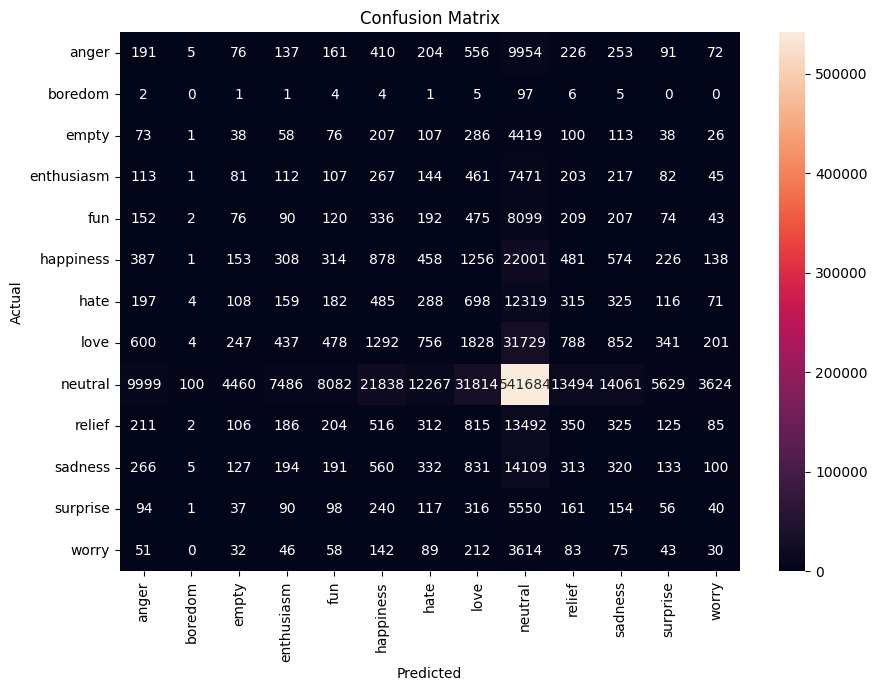

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load your dataset
data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv')

# Example true labels and predictions (replace these with your model's output)
true_labels = data['Emotion']  # Assuming this is your true labels
predictions = true_labels.sample(frac=1).values  # Example: Shuffle true labels as a placeholder for actual predictions

# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=np.unique(true_labels))

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()